# Logistic Regression
Predicting a class (Category) from independent variables

## Libraries

In [1]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Library - SKLEARN

In [2]:
# Load Logistic Regression Libraries - SKLEARN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Data

In [3]:
# Create a sample numpy data
x = np.arange(10).reshape(-1,1) #single column data, IV
y = np.array([0,0,0,0,1,1,1,1,1,1])  # DV
print(x, '\n', y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] 
 [0 0 0 0 1 1 1 1 1 1]


## Create Model

In [5]:
logModel = LogisticRegression(solver = 'liblinear', random_state=0)
# or logModel = LogisticRegression(solver = 'liblinear', random_state=0).fit(x, y)

In [6]:
logModel.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

## Model Statistics

In [9]:
logModel.classes_   # different classes of DV

array([0, 1])

In [10]:
logModel.intercept_  # intercept in  y = intercept + coeff * x

array([-1.04608067])

In [11]:
logModel.coef_   #coeff also called odds ratio
# if x changes by one unit, probability of y changes by .51

array([[0.51491375]])

In [ ]:
# y = -1.04 + .51 * x

## Model Evaluate

In [12]:
logModel.predict_proba(x)  # 2 column output : prob of 0 (left) and 1 (right)
# if first row values are .74, and .25
#here when x = 0, acutal predicted class is 0; 
#while predicted class is 0  with probability of 0.74 and 
#predicted class is 1 with probability with 0.25

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [13]:
logModel.predict(x) # Predicted classes instead of probabilities
# here if first value is 0, then for x= 0, predicted class is 0 which is same as original class

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [19]:
np.stack([y, logModel.predict(x)], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

## Model Accuracy

In [15]:
logModel.score(x, y)  
# if value is .9, 9 times out of 10, predicted class is correct (same as orginal)

0.9

### Confusion Matrix

In [16]:
confusion_matrix(y, logModel.predict(x))
# TN, FP  = 3, 1
# FN, TP  = 0, 6
# we should have max values in True Negative(TN) and True Positive(TP)

array([[3, 1],
       [0, 6]], dtype=int64)

<AxesSubplot:>

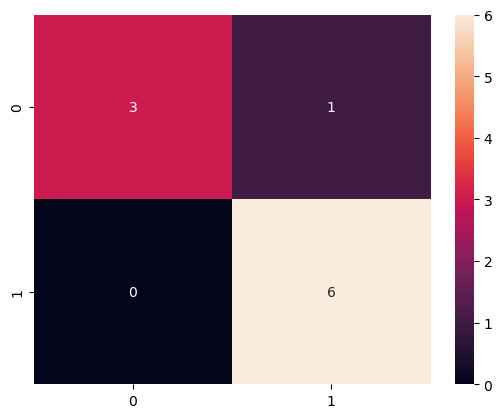

In [20]:
# Draw Heat Map to visually see the outut
cm = confusion_matrix(y, logModel.predict(x))
sns.heatmap(cm, annot=True)

### Classification Report

In [21]:
classification_report(y, logModel.predict(x))

'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86         4\n           1       0.86      1.00      0.92         6\n\n    accuracy                           0.90        10\n   macro avg       0.93      0.88      0.89        10\nweighted avg       0.91      0.90      0.90        10\n'

In [ ]:
# output values
# Accuracy - .91

## End Here